In [2]:
import pandas as pd
import numpy as np
import os
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Data Import

In [3]:
features_df = pd.read_csv("Features_data_set.csv")
sales_df = pd.read_csv("sales_data_set.csv")
stores_df = pd.read_csv("stores_data_set.csv")

In [4]:
# convert date column to pandas datetime format
features_df["Date"] = pd.to_datetime(features_df["Date"], format="%d/%m/%Y")
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%d/%m/%Y")

# Explore and Analyze Dataframes

In [5]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
num_feature_samples, num_features = features_df.shape
num_sale_samples, num_sale_features = sales_df.shape
num_stores_samples, num_stores_features = stores_df.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


## Get statistics of each dataframe

In [9]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
sales_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


## Analyze Features Dataframe

In [12]:
markdown_columns_list = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
for column_name in markdown_columns_list:
    markdown_frac = features_df[column_name].isnull().sum() / features_df[column_name].shape[0]
    print(f"{int(100 * round(markdown_frac, 2))}% of {column_name} values are NaN.")

51% of MarkDown1 values are NaN.
64% of MarkDown2 values are NaN.
56% of MarkDown3 values are NaN.
57% of MarkDown4 values are NaN.
51% of MarkDown5 values are NaN.


Markdown data have a lot of NaN values. Drop these features later when the training features are created.



Dates can be used to organize the information. Let's combine the features df and sales df dataframes into one.

We will do the following, using the column date, join a dataframe containing features and sales and then estimate million-dollar weekly revenues.

In [13]:
features_df_grouped = features_df.groupby("Date").agg({"Temperature": "mean",
                                                     "Fuel_Price": "mean",
                                                     "CPI": "mean",
                                                     "Unemployment": "mean",
                                                      "IsHoliday": "min"})
features_df_grouped.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,
2010-02-05,34.037333,2.717844,167.730885,8.619311,False
2010-02-12,34.151333,2.694022,167.825608,8.619311,True
2010-02-19,37.719778,2.672067,167.871686,8.619311,False
2010-02-26,39.243556,2.683933,167.909657,8.619311,False
2010-03-05,42.917333,2.731200,167.947628,8.619311,False


In [14]:
sales_df_grouped = sales_df.groupby("Date").agg({"Weekly_Sales" : "sum"})
sales_df_grouped["Weekly_Sales"] = (sales_df_grouped["Weekly_Sales"] / 1e6).astype(int)
sales_df_grouped.head()

,Weekly_Sales
Date,
2010-02-05,49
2010-02-12,48
2010-02-19,48
2010-02-26,43
2010-03-05,46


In [15]:
# now: create a merged dataframe
data_datewise_df = pd.merge(features_df_grouped, sales_df_grouped, on=["Date"], how="left").reset_index()
data_datewise_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,False,49.0
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,True,48.0
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,False,48.0
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,False,43.0
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,False,46.0


In [16]:
print(f"Num samples: {data_datewise_df.shape[0]} | Num features: {data_datewise_df.shape[1]}\n\n")
print(data_datewise_df.info())

Num samples: 182 | Num features: 7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          182 non-null    datetime64[ns]
 1   Temperature   182 non-null    float64       
 2   Fuel_Price    182 non-null    float64       
 3   CPI           169 non-null    float64       
 4   Unemployment  169 non-null    float64       
 5   IsHoliday     182 non-null    bool          
 6   Weekly_Sales  143 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(5)
memory usage: 8.8 KB
None


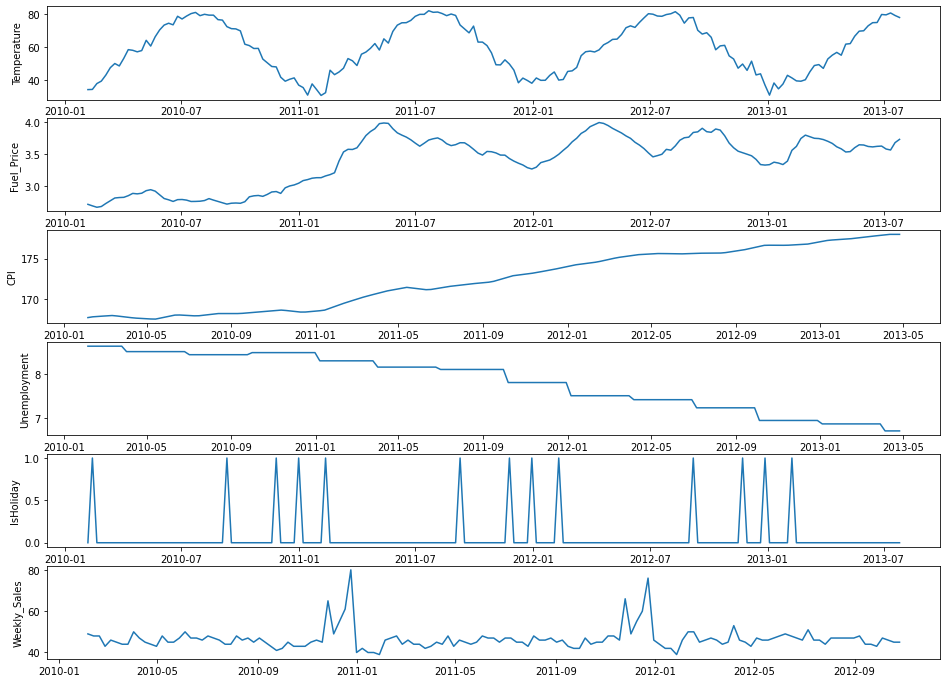

In [17]:
fig = plt.figure(figsize = (16, 12))
count_columns_ex_date = len(data_datewise_df.columns[1:])
for idx, col in enumerate(data_datewise_df.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(data_datewise_df["Date"], data_datewise_df[col])
    plt.ylabel(col)

Text(0, 0.5, 'Weekly Sales')

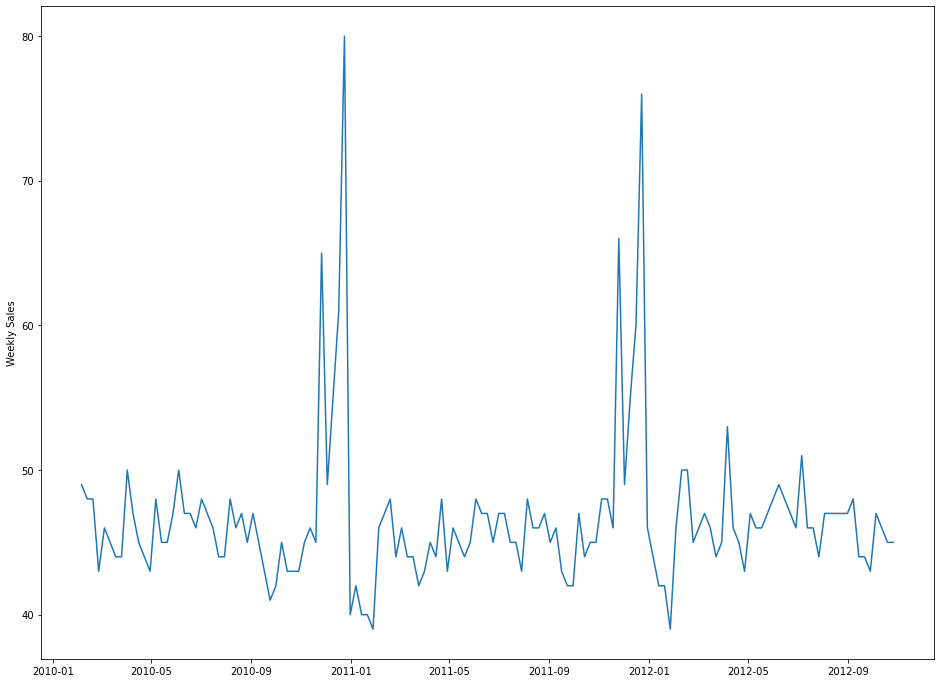

In [24]:
fig = plt.figure(figsize = (16, 12))
plt.plot(data_datewise_df["Date"], data_datewise_df["Weekly_Sales"])
plt.ylabel("Weekly Sales")

<AxesSubplot:>

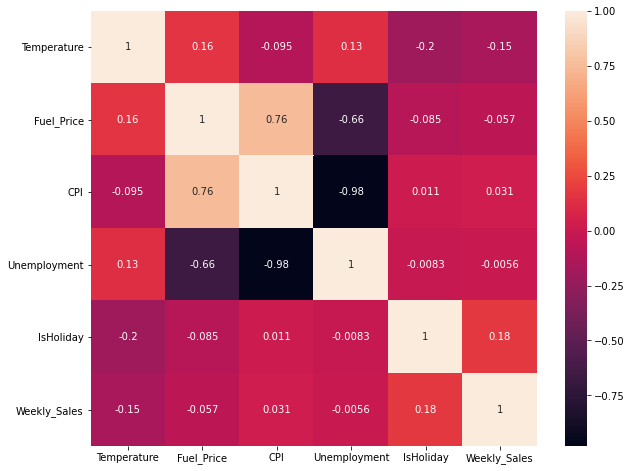

In [19]:
sns.heatmap(data_datewise_df.corr(), annot=True)

## Analyze All Data Storewise

In [20]:
sales_df_grouped = sales_df.groupby("Store").agg({"Weekly_Sales": "sum",
                                                 "IsHoliday": "min"})
data_storewise_df = pd.merge(stores_df, sales_df_grouped, on=["Store"], how="left")
data_storewise_df["Weekly_Sales"] = (data_storewise_df["Weekly_Sales"] / 1e6).astype(int)
data_storewise_df.head()

,Store,Type,Size,Weekly_Sales,IsHoliday
0,1,A,151315,222,False
1,2,A,202307,275,False
2,3,B,37392,57,False
3,4,A,205863,299,False
4,5,B,34875,45,False


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type', ylabel='Size'>

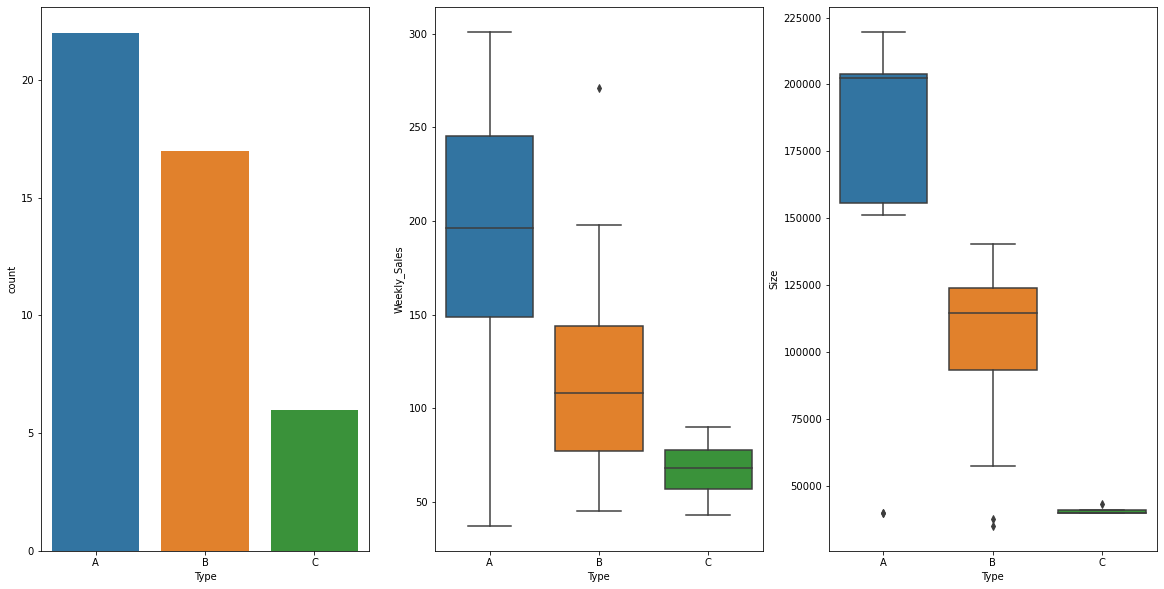

In [21]:
# create histogram of weekly sales per store
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(data_storewise_df["Type"], ax=ax1)
sns.boxplot(data=data_storewise_df, y="Weekly_Sales", x="Type", ax=ax2)
sns.boxplot(data=data_storewise_df, y="Size", x="Type", ax=ax3)

Text(0.5, 0, 'Store Number')

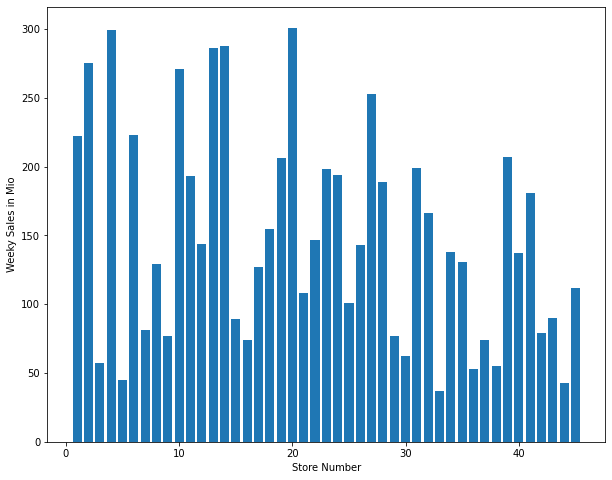

In [22]:
# weekly sales per store
bins = np.arange(1, 46)
plt.bar(x=bins, height=data_storewise_df["Weekly_Sales"].to_numpy())
plt.ylabel("Weeky Sales in Mio")
plt.xlabel("Store Number")

<AxesSubplot:>

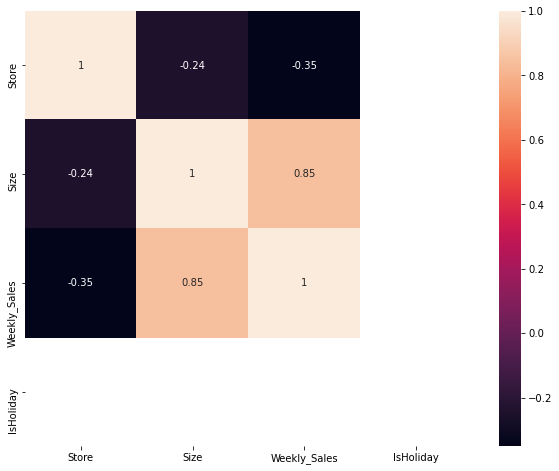

In [23]:
sns.heatmap(data_storewise_df.corr(), annot=True)